In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\SHRI\\Desktop\\2020\\heart_2020_cleaned.csv")

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

18078

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

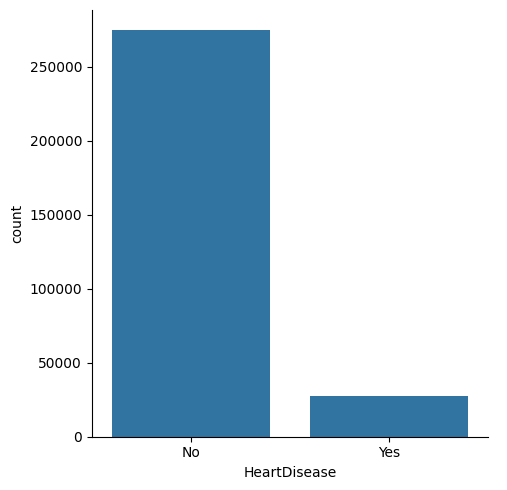

In [8]:
sns.catplot(x="HeartDisease",data=df,kind="count")
plt.show()

In [9]:
#As we can see the dataset is imbalanced
cat_feats=df.select_dtypes("object").columns
len(cat_feats),cat_feats


(14,
 Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
        'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
       dtype='object'))

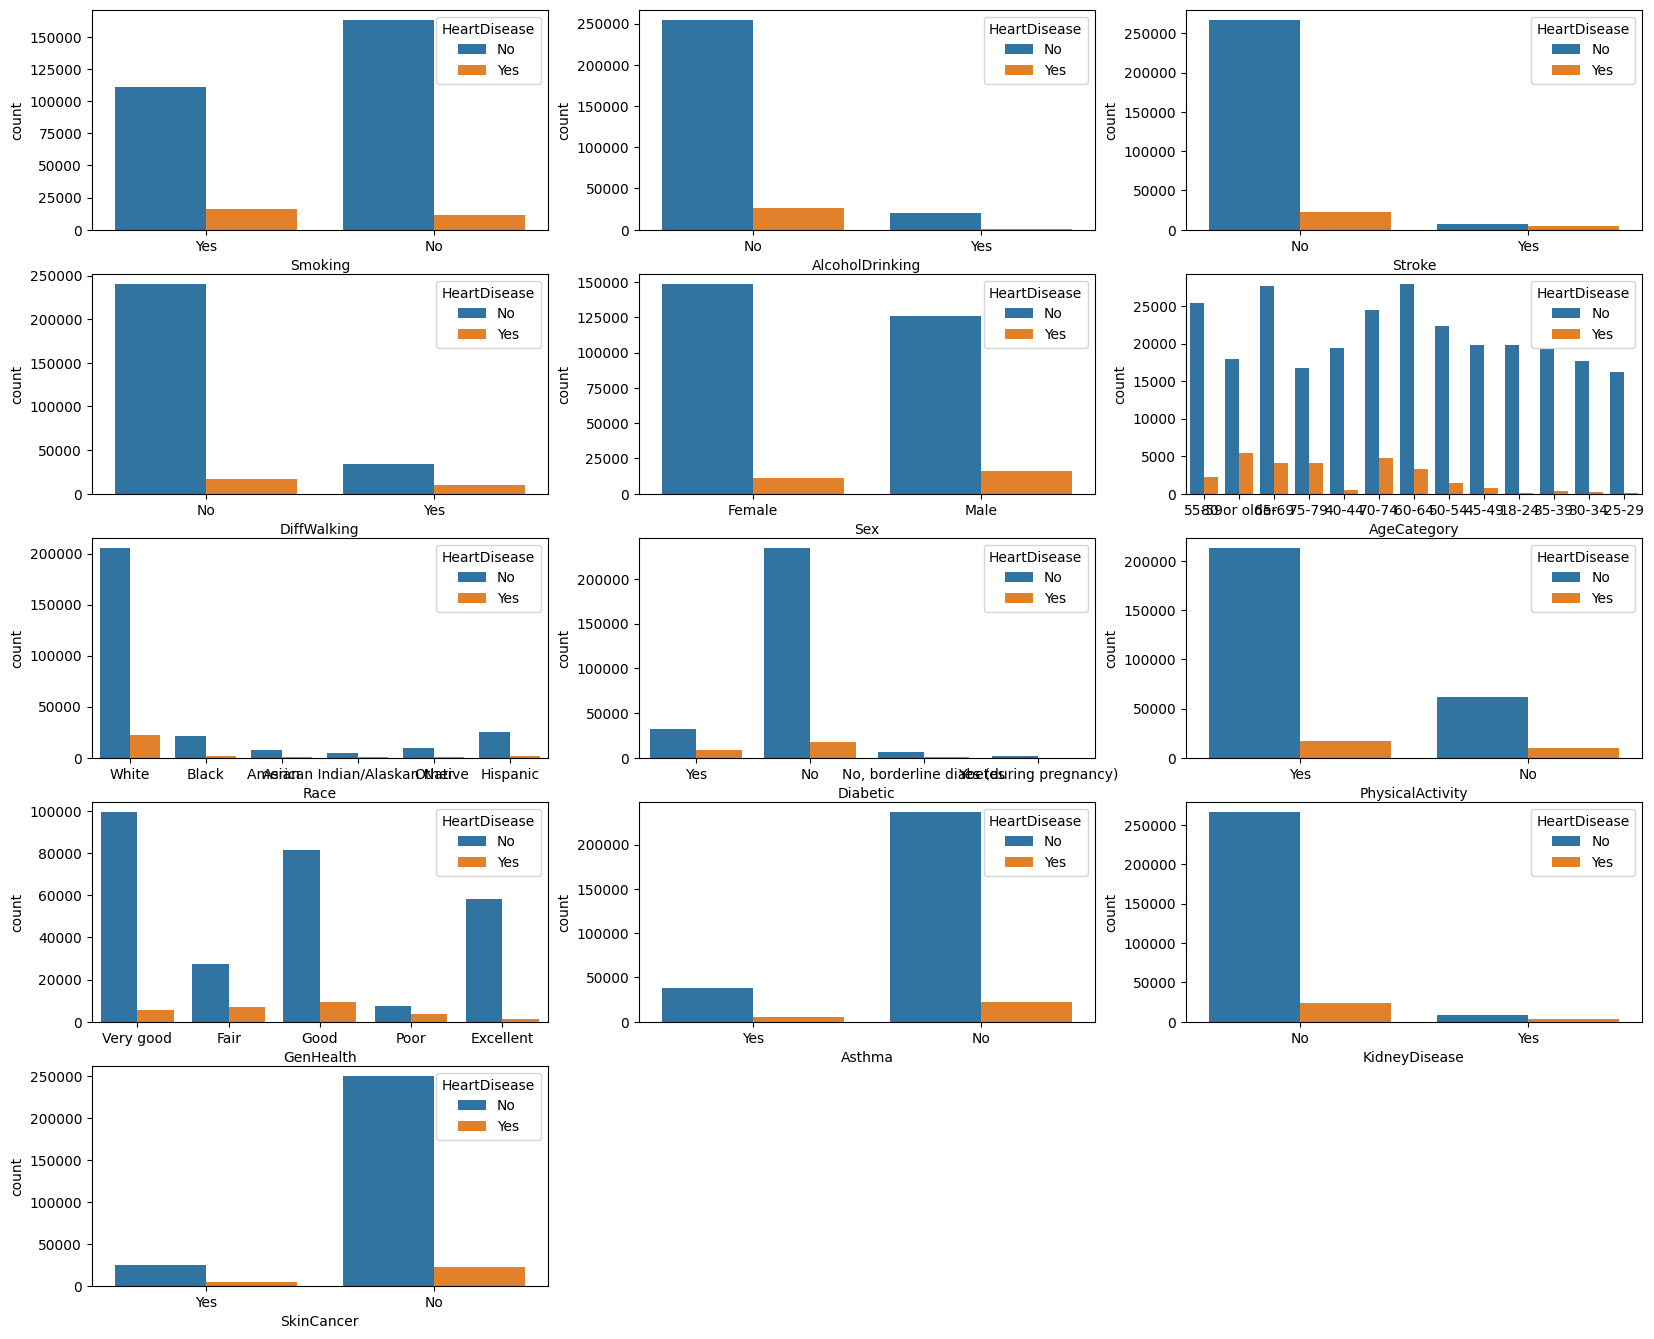

In [10]:
# Key risk factors for heart disease: Smoking, Stroke, Diabetes, Lack of Physical Activity, Age (55+), Poor General Health, Difficulty Walking, and Male Sex.
# After identifying these key risk factors, we will try to prioritize them in feature selection and model training to improve the accuracy of heart disease prediction.
plt.figure(figsize=(20,20))

for i in range(1,len(cat_feats)):
    plt.subplot(6,3,i)
    sns.countplot(x=cat_feats[i],data=df,hue="HeartDisease")
    
# plt.tight_layout()
plt.show()

In [11]:
df['HeartDisease']=df['HeartDisease'].apply(lambda x:1 if x=='Yes' else 0)
df['HeartDisease']=df['HeartDisease'].astype(float)

In [12]:
num_feats=df.select_dtypes("number").columns
num_feats


Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

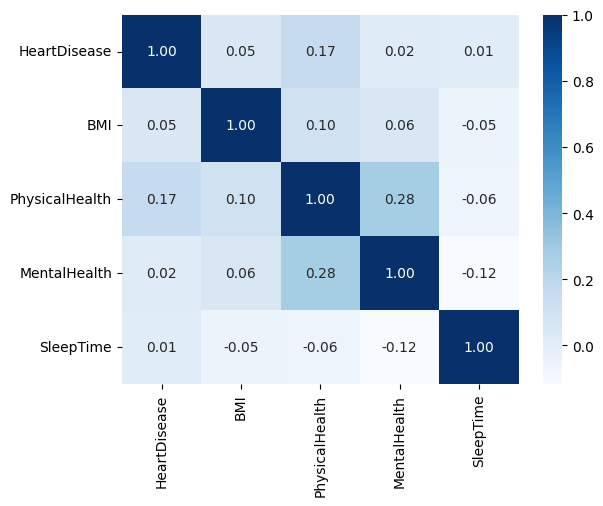

In [13]:
sns.heatmap(df[num_feats].corr(),annot=True,fmt="0.02f",cmap="Blues")
plt.show()


In [14]:
cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
             'Asthma', 'KidneyDisease', 'SkinCancer']

num_feats = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [16]:
 x_train,x_test,y_train,y_test=train_test_split(df.drop("HeartDisease",axis=1),df["HeartDisease"],stratify=df["HeartDisease"],shuffle=True,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((211201, 17), (90516, 17), (211201,), (90516,))

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
tran = ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(drop='first'), cat_feats),     # Apply OneHotEncoder to categorical features in cat_feats
    ("scaling", StandardScaler(), num_feats)    # Apply StandardScaler to numerical features in num_feats
])
tran

ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Smoking', 'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity', 'GenHealth',
                                  'Asthma', 'KidneyDisease', 'SkinCancer']),
                                ('scaling', StandardScaler(),
                                 ['BMI', 'PhysicalHealth', 'MentalHealth',
                                  'SleepTime'])])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preprocessing", tran),                   # Step 1: Apply the ColumnTransformer (tran) for preprocessing
    ("classification", LogisticRegression(max_iter=10000))   # Step 2: Fit a Logistic Regression model on the preprocessed data
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('scaling', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification', LogisticRegression(max_iter=10000))])

In [19]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the pipeline using cross-validation
# Input: pipeline (with preprocessing and classification), x_train (features), y_train (target), and kf (cross-validation object)
# Output: cv_scores - an array of cross-validation scores, one for each of the 10 folds
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf)
cv_scores

array([0.91259884, 0.91051136, 0.9109375 , 0.91321023, 0.91183712,
       0.91060606, 0.90932765, 0.91193182, 0.91051136, 0.91122159])

In [20]:
from sklearn.metrics import classification_report
pipeline.fit(x_train, y_train)

# Now you can make predictions on the test set
y_pred = pipeline.predict(x_test)
y_pred_prob=pipeline.predict_proba(x_test)[:,1]

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     82338
         1.0       0.56      0.10      0.17      8178

    accuracy                           0.91     90516
   macro avg       0.74      0.55      0.56     90516
weighted avg       0.88      0.91      0.88     90516

